<font size=4 >First load the required libraries.</font>

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

%matplotlib inline

# turn off warnings for final notebook
import warnings
warnings.filterwarnings('ignore')

In [29]:
# Read Data form local file path
marketing_feature_df = pd.read_csv("marketing_feature_df.csv")

In [30]:
# View database column types
marketing_feature_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2237 non-null   int64  
 1   Year_Birth           2237 non-null   int64  
 2   Education            2237 non-null   object 
 3   Marital_Status       2237 non-null   object 
 4   Income               2237 non-null   float64
 5   Kidhome              2237 non-null   int64  
 6   Teenhome             2237 non-null   int64  
 7   Dt_Customer          2237 non-null   object 
 8   Recency              2237 non-null   int64  
 9   MntWines             2237 non-null   int64  
 10  MntFruits            2237 non-null   int64  
 11  MntMeatProducts      2237 non-null   int64  
 12  MntFishProducts      2237 non-null   int64  
 13  MntSweetProducts     2237 non-null   int64  
 14  MntGoldProds         2237 non-null   int64  
 15  NumDealsPurchases    2237 non-null   i

In [31]:
# Display the first five rows 
marketing_feature_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Children_number,Customer_Year,Total_Mnt,Total_Purchases,Total_Campaigns
0,1826,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,...,0,0,1,0,SP,0,2014,1190,15,1
1,1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,...,0,1,1,0,CA,0,2014,577,18,2
2,10476,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,...,0,0,0,0,US,1,2014,251,11,0
3,1386,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,...,0,0,0,0,AUS,2,2014,11,4,0
4,5371,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,...,0,0,1,0,SP,1,2014,91,8,2


3.Statistical Analysis
===

3.1 Factors related to the number of store purchases
---

<font size=3 >First remove the extraneous columns.</font>

In [32]:
# drop unique ID
marketing_feature_df.drop(columns=['ID', 'Dt_Customer'], inplace=True)

<font size=3 >Check the number of unique values each column has.</font>

In [33]:
# Check the number of unique values
marketing_feature_df.nunique().sort_values() 

Complain                  2
Response                  2
AcceptedCmp2              2
AcceptedCmp1              2
AcceptedCmp5              2
AcceptedCmp4              2
AcceptedCmp3              2
Customer_Year             3
Kidhome                   3
Teenhome                  3
Children_number           4
Education                 5
Total_Campaigns           6
Marital_Status            8
Country                   8
NumStorePurchases        14
NumCatalogPurchases      14
NumWebPurchases          15
NumDealsPurchases        15
NumWebVisitsMonth        16
Total_Purchases          39
Year_Birth               56
Recency                 100
MntFruits               158
MntSweetProducts        177
MntFishProducts         182
MntGoldProds            213
MntMeatProducts         557
MntWines                775
Total_Mnt              1054
Income                 1972
dtype: int64

In [34]:
# View database column types
marketing_feature_df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2237 entries, 0 to 2236
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2237 non-null   int64  
 1   Education            2237 non-null   object 
 2   Marital_Status       2237 non-null   object 
 3   Income               2237 non-null   float64
 4   Kidhome              2237 non-null   int64  
 5   Teenhome             2237 non-null   int64  
 6   Recency              2237 non-null   int64  
 7   MntWines             2237 non-null   int64  
 8   MntFruits            2237 non-null   int64  
 9   MntMeatProducts      2237 non-null   int64  
 10  MntFishProducts      2237 non-null   int64  
 11  MntSweetProducts     2237 non-null   int64  
 12  MntGoldProds         2237 non-null   int64  
 13  NumDealsPurchases    2237 non-null   int64  
 14  NumWebPurchases      2237 non-null   int64  
 15  NumCatalogPurchases  2237 non-null   i

<font size=3 >You can see that there are 3 categorical variables, 'Education', 'Marital_Status' and 'Country'</font>

In [35]:
# Pick out categorical attributes
categorical_df = marketing_feature_df.select_dtypes(include=('object'))

In [36]:
categorical_df.head()

,Education,Marital_Status,Country
0,Graduation,Divorced,SP
1,Graduation,Single,CA
2,Graduation,Married,US
3,Graduation,Together,AUS
4,Graduation,Single,SP


<font size=3 >One-hot processing of categorical variables.</font>

In [37]:
# Process categorical values into one-hot form
categorical_dummy_df = pd.get_dummies(categorical_df)
categorical_dummy_df.head()

,Education_2n Cycle,Education_Basic,Education_Graduation,Education_Master,Education_PhD,Marital_Status_Absurd,Marital_Status_Alone,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,...,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,0,0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0


<font size=3 >Merge the one-hot processed data with the original data set.</font>

In [38]:
# Remove unnecessary columns
marketing_feature_df.drop(columns=['Education', 'Marital_Status','Country'], inplace=True)

In [39]:
# Merge the one-hot processed data with the original data set
marketing_dummy_df = pd.concat([marketing_feature_df, categorical_dummy_df], axis=1)

In [40]:
# Display the first five rows  
marketing_dummy_df.head()

,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,Marital_Status_Widow,Marital_Status_YOLO,Country_AUS,Country_CA,Country_GER,Country_IND,Country_ME,Country_SA,Country_SP,Country_US
0,1970,84835.0,0,0,0,189,104,379,111,189,...,0,0,0,0,0,0,0,0,1,0
1,1961,57091.0,0,0,0,464,5,64,7,0,...,0,0,0,1,0,0,0,0,0,0
2,1958,67267.0,0,1,0,134,11,59,15,2,...,0,0,0,0,0,0,0,0,0,1
3,1967,32474.0,1,1,0,10,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1989,21474.0,1,0,0,6,16,24,11,0,...,0,0,0,0,0,0,0,0,1,0


<font size=3 >Fit a linear regression model to the training data (70% of the dataset)</font>

<font size=3 >Evaluate the predictions on the test data (30% of the dataset) using RMSE:</font>

<font size=3 >Isolate X and y variables, and split the dataset into two parts, train and test.</font>

In [41]:
# isolate X and y variables, and perform train-test split
X = marketing_dummy_df.drop(columns='NumStorePurchases')
y = marketing_dummy_df['NumStorePurchases']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Use linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
preds = model.predict(X_test)

# evaluate model using RMSE
print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median value of target variable: ", y.median())

Linear regression model RMSE:  3.4429573776228797e-13
Median value of target variable:  5.0


<font size=3 >Using feature importance ranking to identify significant factors affecting store purchase quantity.</font>

In [42]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=5)

<font size=3 >It can be concluded that there are 4 important factors that affect store purchases:</font>
    
<font size=3 >'Total_Purchases', 'NumCatalogPurchases', 'NumWebPurchases', 'NumDealsPurchases'</font>

<font size=3 >I explore the directionality of these effects using SHAP values:</font>

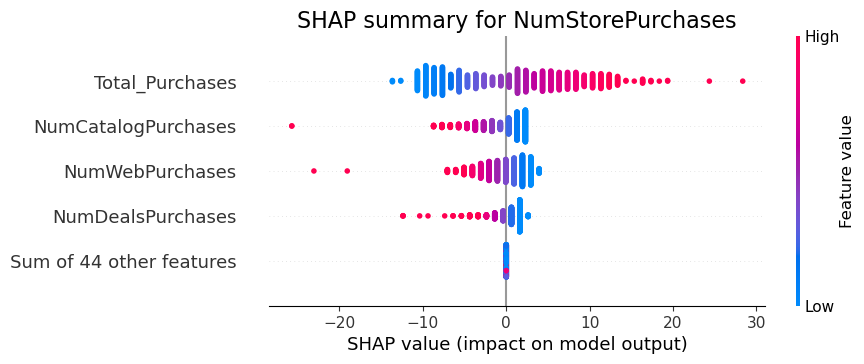

In [43]:
import shap

# calculate shap values 
ex = shap.Explainer(model, X_train)
shap_values = ex(X_test)

# plot
plt.title('SHAP summary for NumStorePurchases', size=16)
shap.plots.beeswarm(shap_values, max_display=5);

<font size=3 >Through the shape graph, the following can be observed:</font>

<font size=3 >'TotalPurchases': The quantity of purchases made at the store increases with an increase in the total number of purchases.</font>

<font size=3 >'NumCatalogPurchases', 'NumWebPurchases', 'NumDealsPurchases':</font>
<font size=3 >The quantity of purchases made at the store decreases with an increase in the number of catalog purchases, web purchases, or deal purchases.</font>

3.2 Analysis of purchase volume in different countries
---

In [44]:
# Read Data form local file path
marketing_feature_df = pd.read_csv("marketing_feature_df.csv")

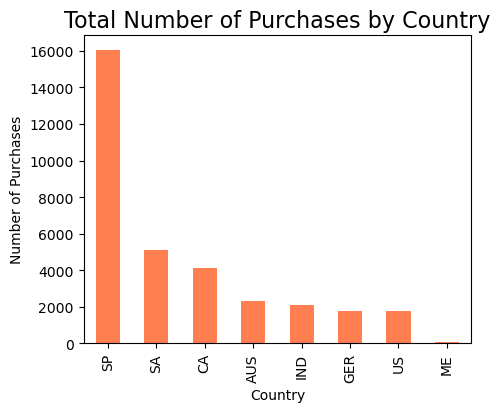

In [45]:
# Draw a bar plot of purchases in different countries
plt.figure(figsize=(5,4))
marketing_feature_df.groupby('Country')['Total_Purchases'].sum().sort_values(ascending=False).plot(kind='bar',color = 'coral')
plt.title('Total Number of Purchases by Country', size=16)
plt.ylabel('Number of Purchases');

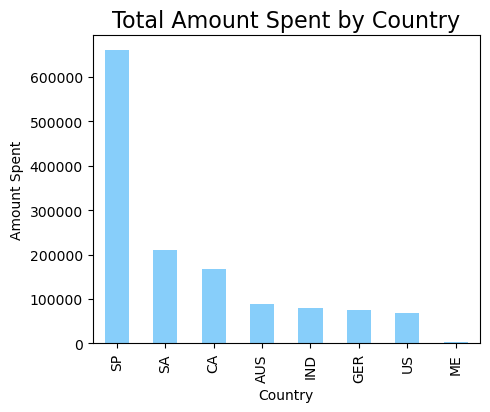

In [46]:
# Draw a bar plot of total cost in different countries
plt.figure(figsize=(5,4))
marketing_feature_df.groupby('Country')['Total_Mnt'].sum().sort_values(ascending=False).plot(kind='bar',color = 'lightskyblue')
plt.title('Total Amount Spent by Country', size=16)
plt.ylabel('Amount Spent');

<font size=3 >According to the bar chart, it can be seen that the SP country has the largest purchasing power, followed by SA, CA.....</font>

3.3 Analyze the consumption of people who buy gold
---

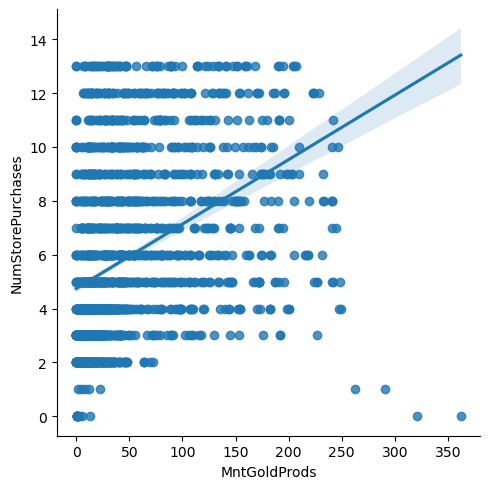

In [47]:
# lmplot diagram of plotting the relationship between people who buy gold and store purchases
sns.lmplot(x='MntGoldProds', y='NumStorePurchases', data = marketing_feature_df)

<font size=3 >Use Kendall for correlation analysis</font>

In [48]:
from scipy.stats import kendalltau

kendall_corr = kendalltau(x=marketing_feature_df['MntGoldProds'], y=marketing_feature_df['NumStorePurchases'])

# print results
print('Kendall correlation (tau): ', kendall_corr.correlation)
print('Kendall p-value: ', kendall_corr.pvalue)

Kendall correlation (tau):  0.3927160395725131
Kendall p-value:  3.55881817905435e-152


<font size=3 >It can be seen that the people who buy gold are positively correlated with the store purchases.</font>

3.4 See what factors affect fish purchases
---

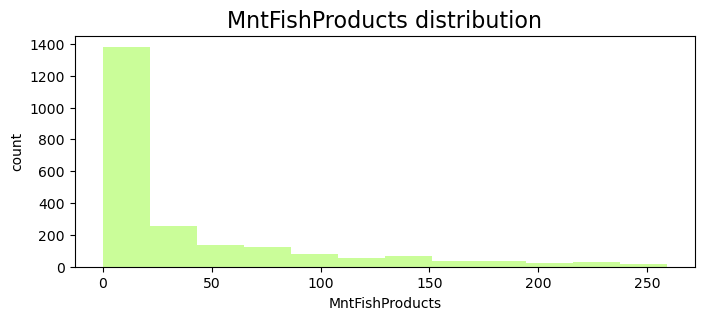

In [49]:
# Plot a histogram of fish product purchases
plt.figure(figsize=(8,3))
sns.distplot(marketing_dummy_df['MntFishProducts'], kde=False, hist=True, bins=12,color = 'lawngreen' )
plt.title('MntFishProducts distribution', size=16)
plt.ylabel('count');

<font size=3 >Use the previously mentioned linear regression model and evaluate the test data using RMSE.</font>

In [50]:
# isolate X and y variables, and perform train-test split
X = marketing_dummy_df.drop(columns='MntFishProducts')
y = marketing_dummy_df['MntFishProducts']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# predictions
preds = model.predict(X_test)

# evaluate model using RMSE
print("Linear regression model RMSE: ", np.sqrt(mean_squared_error(y_test, preds)))
print("Median value of target variable: ", y.median())

Linear regression model RMSE:  6.21478472615961e-13
Median value of target variable:  12.0


<font size=3 >Use feature importance rankings to identify important factors affecting fish purchases.</font>

In [51]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist(), top=7)

<font size=3 >It can be concluded that there are 6 important factors that affect store purchases:</font>

<font size=3 >'Total_Mnt', 'MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntSweetProducts', 'MntFruits'</font>

<font size=3 >I explore the directionality of these effects using SHAP values:</font>

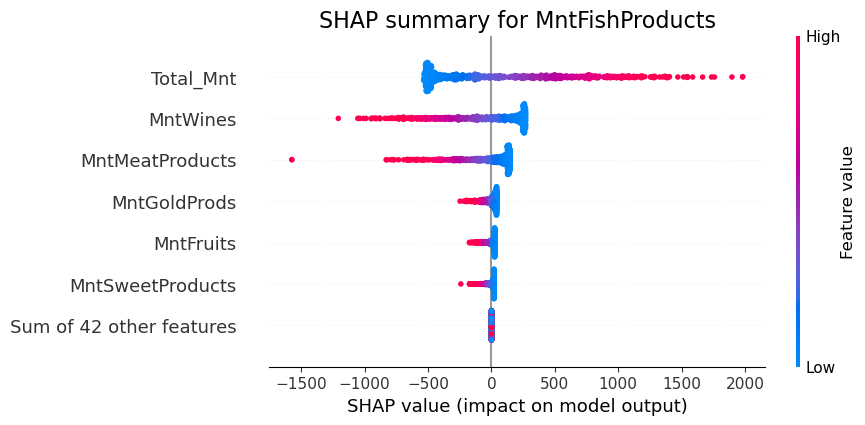

In [52]:
# calculate shap values 
ex = shap.Explainer(model, X_train)
shap_values = ex(X_test)

# plot
plt.title('SHAP summary for MntFishProducts', size=16)
shap.plots.beeswarm(shap_values, max_display=7);

<font size=3 >1. 'TotalMnt': As the total customer expenditure increases, the amount spent on fish also increases, showing a positive correlation.</font>

<font size=3 >2. 'MntWines', 'MntMeatProducts', 'MntGoldProds', 'MntSweetProducts', 'MntFruits': </font>
    
<font size=3 >As the amount spent on wine, meat products, gold products, fruits, or sweets increases, the amount spent on fish decreases.</font>

3.5 Analyze the differences in the acceptance of campaigns in different countries
---

<font size=3 >Create a Choropleth map illustrating the campaigns acceptance levels across different countries.</font>

In [53]:
# In preparation for drawing, reassign country names
marketing_feature_df['Country_code'] = marketing_feature_df['Country'].replace({'SP': 'ESP', 'CA': 'CAN', 'US': 'USA', 'SA': 'ZAF', 'ME': 'MEX'})

# success of campaigns by country code
df_cam = marketing_feature_df[['Country_code', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response']].melt(
    id_vars='Country_code', var_name='Campaign', value_name='Accepted (%)')
df_cam = pd.DataFrame(df_cam.groupby(['Country_code', 'Campaign'])['Accepted (%)'].mean()*100).reset_index(drop=False)

# rename the campaign variables so they're easier to interpret
df_cam['Campaign'] = df_cam['Campaign'].replace({'AcceptedCmp1': '1',
                                                'AcceptedCmp2': '2',
                                                'AcceptedCmp3': '3',
                                                'AcceptedCmp4': '4',
                                                'AcceptedCmp5': '5',
                                                 'Response': 'Most recent'
                                                })

# choropleth plot
import plotly.express as px

fig = px.choropleth(df_cam, locationmode='ISO-3', color='Accepted (%)', facet_col='Campaign', facet_col_wrap=2,
                    facet_row_spacing=0.05, facet_col_spacing=0.01, width=700,
                    locations='Country_code', projection='natural earth', title='Advertising Campaign Success Rate by Country'
                   )
fig.show()

<font size=3 >The Choropleth map reveals that different countries have varying levels of acceptance for different campaigns. Among them, Mexico shows the highest level of acceptance, particularly evident in campaign 3 and the most recent campaign. Across all campaigns, the most recent campaign has the highest level of activity acceptance.</font>